# <span style="color:blue">KNN CLASSIFICATION PROJECT</span>

# Complete the below codes:-

In [1]:
#importing important libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

# 1.LOAD THE DATASET

In [2]:
#load the dataset
diamond = pd.read_csv(r"C:\Users\HP\Desktop\T&C Development\Graduate Program\AI and DL\classification\diamonds.csv")

In [3]:
diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#write the code to check null values in the datasets.....
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#write code to check the value_count of cut column of dataset.
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

# 2.SPLIT DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES

In [8]:
X,y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)

In [9]:
X

array([[-4.19588283, -1.3595652 ,  1.10491272, ...,  0.55728776,
        -0.80835544,  2.58610484],
       [ 3.7849783 ,  0.27005727, -0.26081744, ...,  2.07808957,
         2.5252734 ,  2.46240471],
       [ 0.82885114,  1.87085989, -0.80706592, ...,  1.32434912,
        -1.88503061,  2.1845548 ],
       ...,
       [ 0.52759848, -0.41467402,  0.73746164, ..., -1.49090017,
        -0.47391996,  2.76831975],
       [-1.42703575, -0.40209723, -2.05649914, ..., -2.14006124,
        -0.90401821, -0.46628567],
       [-0.79880641, -1.03347563, -2.91039069, ...,  0.27213218,
        -0.01007541,  0.49538158]])

In [10]:
y

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1])

# 3.SPLIT THE DATASET INTO TRAIN AND TEST SET

In [11]:
#write the code to split dataset into train and test data............
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

# 4.DATA TRANSFORMATION

In [12]:
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)

In [13]:
#write the code to see the shape of the train and test data..........
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (160, 8)
X_test :  (40, 8)
y_train :  (160,)
y_test :  (40,)


In [14]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

# 5.PLOTTING

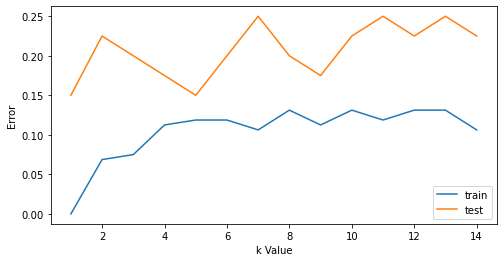

In [15]:
plt.figure(figsize=(8,4))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

# 6.TRAIN YOUR MODEL

In [16]:
#write the code to create knn object.....
knn = KNeighborsClassifier(n_neighbors = 7) # by default k's value is 5
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# 7.FIND ACCURACY TO KNOW THE PERFORMANCE OF MODEL

In [17]:
y_pred= knn.predict(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.neural_network import MLPRegressor

In [19]:
print("Accuracy with k = 7 :", accuracy_score(y_test, y_pred)*100)

Accuracy with k = 7 : 75.0


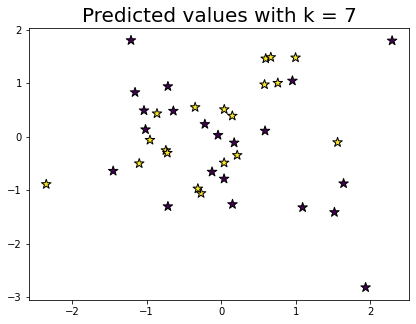

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k = 7", fontsize=20)
plt.show()

#  Limitations of KNN Algorithm
KNN is a straightforward algorithm to grasp. It does not rely on any internal machine learning model to generate predictions. KNN is a classification method that simply needs to know how many categories there are to work (one or more). This means it can quickly assess whether or not a new category should be added without having to know how many others there are.

The drawback of this simplicity is that it can’t anticipate unusual things (like new diseases), which KNN can’t accomplish since it doesn’t know what the prevalence of a rare item would be in a healthy population.

Although KNN achieves high accuracy on the testing set, it is slower and more expensive in terms of time and memory. It needs a considerable amount of memory in order to store the whole training dataset for prediction. Furthermore, because Euclidean distance is very sensitive to magnitudes, characteristics in the dataset with large magnitudes will always outweigh those with small magnitudes.

KNN is one of several lazy learning algorithms that don’t use a learning model to make predictions. By averaging the similarity between an incoming observation and the data already available, KNN creates predictions on the fly (just in time).